<a href="https://colab.research.google.com/github/Sirbabs01/Prodigy_DS_02/blob/main/Prodigy_info_Tech_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relations between variables and identify patterns and trends in the data.

## What we expect to achieve and the questions we hope to answer
* Successfully read the dataset
* Understand the dataset
* print the first 5 rows and the last 5 rows
* Check the information of the dataset
* check if there missing values in the dataset
* Check for duplicate values
* Perform basic arithmetic description on all the numeric columns
* What is the distribution of passenger ages?
* Group sex by age
* How many passengers travelled in each class?
* What is the proportion of males to females?
* How many passengers survived vs died?
* What is the survival rate for each passenger class?


### Import the python libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read the dataset

In [ ]:
data = pd.read_csv('/content/Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Print the first 5 rows

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### print the last 5 rows in the dataset

In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Get information about our dataset its rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Check if there are missing values in the dataset

In [ ]:
# we checking the number of missing values by column
# And find the percentage of missing values to the total number of values
# This will help us determine whether the column data needs to be dropped

# check for missing values and sort them in descending order
missing_data = data.isnull().sum().sort_values(ascending=False).reset_index()

# create a new column called percentage
missing_data['Percentage'] = missing_data[0]/len(data)*100

# Rename the columns
missing_data.columns = ['Column', 'No missing values', 'Percentage']
missing_data


,Column,No missing values,Percentage
0,Cabin,327,78.229665
1,Age,86,20.574163
2,Fare,1,0.239234
3,PassengerId,0,0.000000
4,Survived,0,0.000000
5,Pclass,0,0.000000
6,Name,0,0.000000
7,Sex,0,0.000000
8,SibSp,0,0.000000
9,Parch,0,0.000000


### Find the number duplicate values in the dataset

In [ ]:
if data.duplicated().sum() > 0:
  print(f"There are {data.duplicated().sum()} values in the dataset")
else:
  print("There are no duplicate values in the dataset")

There are no duplicate values in the dataset


### Perform basic arithmetic operations on the numeric columns

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### What are the distribution of passenger ages?

In [ ]:
# since there are missing values in the age column the drop the rows with the missing values
data.dropna(subset=['Age'], inplace=True)

# find the average age of the passengers
print(f"The average age of the passengers is {round(data['Age'].mean(), 2)}")

# Print the median of the ages
print(f"The median of the ages is {round(data['Age'].median(), 2)}")

# print the standard deviation of the ages
print(f"The Standard deviation of the ages is {round(data['Age'].std(), 2)}")

The average age of the passengers is 30.27
The median of the ages is 27.0
The Standard deviation of the ages is 14.18


#### Visualize the age distribution

##### Plot a Histogram of the age distribution

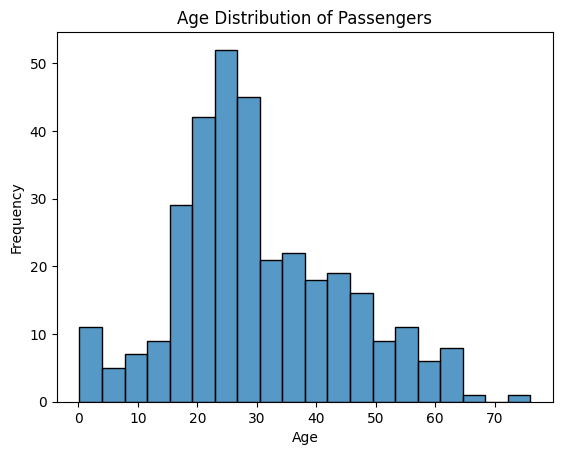

In [ ]:
# Plot a histogram of the age distribution
sns.histplot(data['Age'], bins=20)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the histogram and our brief arithmetric description majority of the  passengers are from ages 20 to 30. From ages 30 to 50 there are still quite a number of passengers with those ages. But there are not many passengers above 70 years of age. The children from age 0-19 years are not that many as compared to adults. We have more adults than children.

### Group sex by ages

In [ ]:
# Group sex by ages and count
df_sex_age = data.groupby('Sex')['Age'].mean().reset_index()
df_sex_age

,Sex,Age
0,female,30.272362
1,male,30.272732


The average age of both men and women is 30.27

### How many passengers travelled in each class

In [ ]:
# call the passenger class column and count
df_pclass_count = data['Pclass'].value_counts().reset_index()
df_pclass_count.columns = ['Passenger Class', 'Number of Passengers']
df_pclass_count

,Passenger Class,Number of Passengers
0,3,218
1,1,107
2,2,93


Majority of the passengers are in 3rd class. We have 218 in 3rd class, 93 in second class and 107 in 1st class.

### What is the proportion of males to females

In [ ]:
# call the sex column and count
df_sex_counts = data['Sex'].value_counts().reset_index()
print(df_sex_counts)

# Give like ratio proportion of males to females
print(f"The ratio of males to female is {round(df_sex_counts.iloc[0,1]/df_sex_counts.iloc[1,1],2)}:1")

      Sex  count
0    male    266
1  female    152
The ratio of males to female is 1.75:1


The males are more than the females

### How many passenger Survived vs Died

In [ ]:
# count the unique values in the survived column
survival = data['Survived'].value_counts().reset_index()
print(survival)

# print the number of passengers that survived and the number that died
print(f"The number of passengers that survived is {survival.iloc[1,1]} \nThe number of passengers that died is {survival.iloc[0,1]}")
# print the percentage of the passengers that survived
print(f"The percentage of passengers that survived is {round(survival.iloc[1,1]/(survival.iloc[0,1] + survival.iloc[1,1])*100, 2)}%")

   Survived  count
0         0    266
1         1    152
The number of passengers that survived is 152 
The number of passengers that died is 266
The percentage of passengers that survived is 36.36%


### What is the survival rate for each passenger class

In [ ]:
# group passenger class by survived and find the relative frequency of each group
groupby_pclass = data.groupby('Pclass')['Survived'].value_counts(normalize = True).reset_index()

# rename columns
groupby_pclass.columns = ['Passenger Class','Survived','Percent']
groupby_pclass.Percent = groupby_pclass.Percent*100
print(groupby_pclass)

# print the survival rates of each class
print(f"The survival rate for 1st class is {round(groupby_pclass.iloc[1,2], 2)}% \nThe survival rate for 2nd class is {round(groupby_pclass.iloc[3,2], 2)}% \nThe survival rate for the third class is {round(groupby_pclass.iloc[5,2], 2)}% ")

   Passenger Class  Survived    Percent
0                1         0  53.271028
1                1         1  46.728972
2                2         0  67.741935
3                2         1  32.258065
4                3         0  66.972477
5                3         1  33.027523
The survival rate for 1st class is 46.73% 
The survival rate for 2nd class is 32.26% 
The survival rate for the third class is 33.03% 


#### Bar chart showing the distribution of passengers that survived and died per class

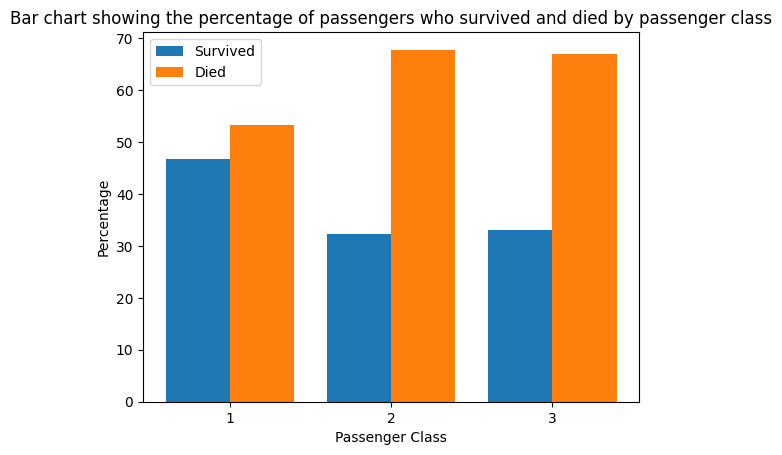

In [ ]:
# filter the dataset groupby_pclass to two groups the data set of survivers an the ones that died
groupby_pclass_survived = groupby_pclass[groupby_pclass.Survived == 1]
groupby_pclass_died = groupby_pclass[groupby_pclass.Survived == 0]

# asign a value to width
width = 0.4

# assign the variable x to the range of the length of the column Passenger class
x = np.arange(len(groupby_pclass_survived['Passenger Class']))

# plt bar chart use boolean indexing to filter out the column you need
plt.bar(x - width/2, groupby_pclass_survived['Percent'], width = 0.4, align = 'edge', label = 'Survived')
plt.bar(x + width/2, groupby_pclass_died['Percent'], width = 0.4, align = 'edge', label = 'Died')
plt.title('Bar chart showing the percentage of passengers who survived and died by passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(x + width/2, groupby_pclass_survived['Passenger Class'])
plt.show()

So from this visualisation the probability of you surviving if you were in the 1st class is higher than in other classes.
In other class the percentage of people that survived was less than those in 1st class.